<a href="https://colab.research.google.com/github/rohan-1314/colab-files/blob/main/2022_10_02_Rohan_Lesson_48.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 48: Capstone Class - Probability Calculation For Gambling

### Teacher-Student Activities


Welcome to the Capstone Class. We hope that you are ready to step into the ring and face the next challenge! We have been always told to avoid gambling. Today, you will learn why you should never gamble and in the process, you will learn how to calculate the expected value.

---

#### Recap

In the MCQ test illustration, The probabilities of the random variables $X = 0, 1, 2, 3, 4$ are

- $P(X = 0) = {}^4C_0 \times \left(\frac{1}{4}\right)^0 \times \left(\frac{3}{4}\right)^4$

- $P(X = 1) = {}^4C_1 \times \frac{1}{4} \times \left(\frac{3}{4}\right)^3$

- $P(X = 2) = {}^4C_2 \times \left(\frac{1}{4}\right)^2 \times \left(\frac{3}{4}\right)^2$

- $P(X = 3) = {}^4C_3 \times \left(\frac{1}{4}\right)^3 \times \frac{3}{4}$

- $P(X = 4) = {}^4C_4 \times \left(\frac{1}{4}\right)^4 \times \left(\frac{3}{4}\right)^0$

In general, in any experiment having total $n$ possible trials, the probability of success in $r$ trials out of $n$ trials is given by 

$$P(X = r) = {}^nC_r \times s^r \times f^{n - r}$$

where 

- ${}^nC_{r} = \frac{n!}{(n-r)! \times r!} = {}^nC_{n - r}$

- $n$ is a natural number and $r$ is a whole number but $r \le n$

- $s$ denotes the probability of **success**

- $f$ denotes the probability of **failure** and $s + f = 1$

In the context of the MCQ test illustration, 

- $n$ is the total number of questions in an MCQ test 

- $r$ is the number of questions to be solved correctly by fluke out of $n$ questions

- ${}^nC_r$ is the number of ways in which $r$ questions can be solved out of $n$ questions correctly by fluke

- **success** is choosing the one correct option out of four options and the **failure** is choosing an incorrect option.


This is called **binomial distribution**. In other words, the distribution of two terms.

Also, the sum of all the probabilities will be equal to one, i.e., 

$P(X = 0) + P(X = 1) + P(X = 2) + \dots + P(X = n - 1) + P(X = n) = 1$


We can also create functions to calculate the factorial value of a number $n$ and to get the probability of a random variable $X = r$.

In [ ]:
# Run the code below.
# Functions to calculate the factorial value of a number 'n'.
def factorial(num):
  factorial = 1
  if num < 0:
    return "Undefined."
  else:
    while num > 0:
      factorial *= num
      num -= 1
    return factorial

# Function to calculate the probability of a random variable X = r.
def prob_random_var(num_trials, random_var, prob_success):
  num_trials_choose_random_var = factorial(num_trials) / ((factorial(num_trials - random_var)) * (factorial(random_var))) # nCr 
  prob_random_var = num_trials_choose_random_var * (prob_success ** random_var) * ((1 - prob_success) ** (num_trials - random_var))
  return prob_random_var

prob_random_var(4, 4, 0.25)

0.00390625

In [ ]:
# Run the code below.
# The probability of solving say 50 questions correctly by fluke in an MCQ test having 100 questions
prob_random_var(100, 50, 0.25)

4.5073108750863835e-08

---

#### Activity 1: Expected Value

Let's find out the average number of questions that can be solved correctly by fluke.

For this, we need to use the concept of expected value. The expected value is the sum of the product of the random variables with their corresponding probabilities.

Let $X$ be a random variable denoting $N$ events $x_1, x_2, x_3 \dots x_N$ and let $p(x_1), p(x_2), p(x_3) \dots p(x_N)$ be their corresponding probabilities, then the expected value $E(X)$ is given by 

$$E(X) = x_1 p(x_1) + x_2 p(x_2) + x_3 p(x_3) + \dots + x_N p(x_N)$$

With this idea in mind, let's now try to find out the average number of questions that can be solved correctly by fluke in an MCQ test having 100 questions.


In [ ]:
# S1.1: Find the average number of questions that can be solved correctly by fluke in an MCQ test having 100 questions.
import numpy as np
random_var = np.arange(0,101)
prob_var_list = [prob_random_var(100,i,0.25)for i in range(101)]
exp_value = np.sum(random_var*np.array(prob_var_list))
print(exp_value)

25.0


So on an average, you are expected to solve 25 questions correctly by fluke in an MCQ test.

In the above code:

1. A NumPy array is created containing the values of all the random variables, i.e., $X = 0, 1, 2, \dots 100$ where

  - 0 denotes solving 0 questions correctly by fluke, 
  
  - 1 denotes solving 1 question correctly by fluke,

  - 2 denotes solving 2 questions correctly by fluke,
  
    ... 
    
  - 100 denotes solving 100 questions correctly by fluke

2. A Python list is created containing the probabilities of all the above 101 events.

3. The above list is then converted to a NumPy array. Then each value of the random variable is multiplied with its corresponding probability. Then all the products are added to get the expected value or theoretical average.

**Note:** The expected value gives a theoretical average. The actual average may differ from the theoretical average by some margin. E.g., in an MCQ test having 100 questions, the expected value tells us that on an average, we can expect to solve 25 questions correctly by fluke.

Interestingly, in the case of a binomial distribution, the expected value is the highly likely event. Let's verify this fact by finding out the most likely event in the case of solving questions correctly by fluke in an MCQ test containing 100 questions.


In [ ]:
# S1.2: Find the most likely event and its probability.
max_prob = np.max(np.array(prob_var_list))
max_prob

0.09179969176683679

So in case of the binomial distribution, the most likely event is the same as the expected value.

We can also create a line plot to visualise the events (denoted by random variables) and their corresponding probabilities, to spot the event having the highest probability.

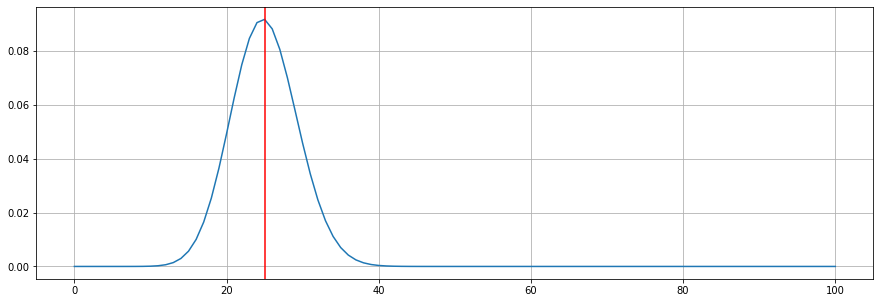

In [ ]:
# S1.3: Create a line plot of random variables and their corresponding probabilities in the case of an MCQ test having 100 questions.
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(random_var,prob_var_list)
plt.axvline(x=exp_value,color='red')
plt.grid()
plt.show()

---

#### Activity 2: Why Should You Never Gamble?

Suppose that you play a game in which you roll two standard 6-sided dice. You win INR 1500 if the sum of the numbers on the dice is 2 and lose INR 50 otherwise. How much do you expect to win on average per trial?

There are 36 possible outcomes of rolling two standard 6-sided dice. They are illustrated in the image shown below.

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/two_dice_outcomes.png' width=600>

The sum of the numbers on the dice will be 2 if and only if the outcome is two $1s$, i.e., $\{1, 1\}$

So, let us define a random variable $X = x$ where $x$ some event. Let $x_1$ denotes that you win INR 1500 after rolling two dice. This is possible only if the outcome of rolling two dice is two $1s$, i.e., $\{1, 1\}$. 

Similarly, let $x_2$ denotes that you lose INR 50 after rolling two dice. This is possible when the outcome is not two $1s$, i.e., $x_2 = \{1', 1'\}$

So, the probability of winning INR 1500 is  $P(X = x_1) = \frac{1}{36}$ because there is only one outcome out of 36 possible outcomes.

Hence, the probability of losing INR 50 is  $P(X = x_2) = \frac{35}{36}$ because there are 35 outcomes out of 36 possible outcomes in which the sum of the numbers on two dice is not 2.

So, your expected winnings after playing one game of rolling two dice are 

$E(X) = x_1 p(x_1) + x_2 p(x_2) = 1500 \times \frac{1}{36} + (-50) \times \frac{35}{36}$




In [ ]:
# S2.1: Calculate your expected winnings after rolling two dice in the above problem.
gamble= (1500/36)-(50*35/36)
gamble

-6.94444444444445

So on an average per trial, you are likely to lose INR $6.945$ in this game. The negative sign denotes that you are likely to lose money. If you play this game say 100 times, then you are likely to lose INR $6.945 \times 100 = 694.5$ after 100 trials.

In general, for a game, if the probability of the favourable outcome(s) is very low, then you should **NOT** gamble on that game because it has been designed in such a way that on an average a player is likely to lose their money. The lotteries are specifically designed for people to lose their money on an average. Very rarely there is a jackpot winner. 

---

#### Activity 3: Continuous Random Variable

Now let's learn the concept of a continuous random variable. But first, recall the bell curve example. The heights of people follow the **normal distribution**. If you create a histogram to plot the heights of 10,000 individuals, the arrangement of the bars in the histogram will appear to form a **bell shape**. 


In [ ]:
# Run the code below.
# NumPy array containing 10,000 random normally distributed numbers having a mean of 165 cm and a standard deviation.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

height_mean = 165
height_std = 15
heights = np.random.normal(height_mean, height_std, size=10000) 
heights[:10]

array([162.18616378, 154.25531491, 160.77411775, 172.01345808,
       124.81339236, 145.93076538, 157.59660021, 144.52255241,
       142.92808822, 173.95768641])

The `np.random.normal()` function takes mean, standard deviation and size (number of numbers to be generated) as inputs and returns a numpy array containing normally distributed random numbers whose mean and standard deviation is very close to the provided mean and standard deviation values.

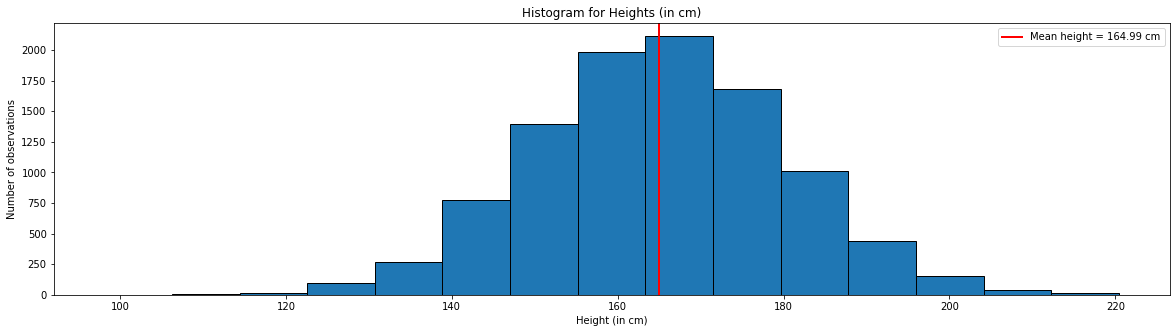

In [ ]:
# Run the code below.
# Histogram for the heights.
plt.figure(figsize=(20, 5))
plt.title('Histogram for Heights (in cm)')
plt.hist(heights, bins='sturges', edgecolor='black') # 'sturges' is one of the ways to compute the number of bins in a histogram.
plt.axvline(np.mean(heights), color='red', label=f'Mean height = {np.mean(heights):.2f} cm', linewidth=2) # Creates a vertical line 
plt.xlabel('Height (in cm)')
plt.ylabel("Number of observations")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


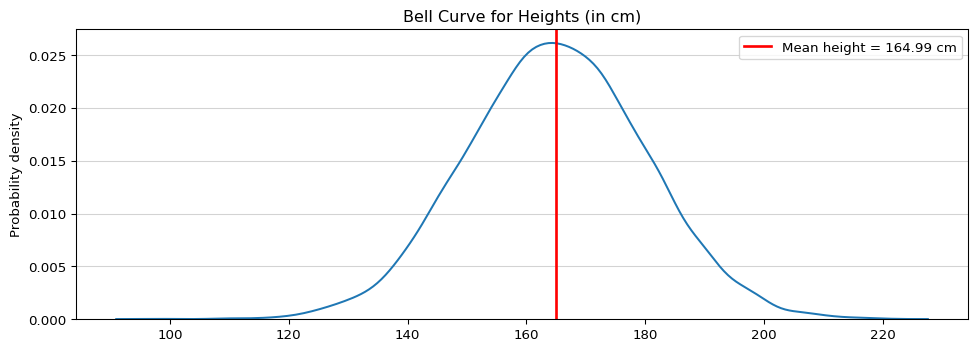

In [ ]:
# Run the code below.
# Bell curve using the 'distplot()' function.
plt.figure(figsize=(12, 4), dpi=96)
plt.title("Bell Curve for Heights (in cm)")
sns.distplot(heights, hist=False, bins='sturges') # 'sturges' is one of the ways to compute the number of bins in a histogram.
plt.axvline(np.mean(heights), color='red', label=f'Mean height = {np.mean(heights):.2f} cm', linewidth=2)
plt.ylabel("Probability density") # The 'y-axis' on the bell curve represent the probability density.
plt.legend()
plt.grid(which='major', axis='y', color='lightgrey')
plt.show()

Recall that 

- Approx. $68 \text{%}$ of the values lie between $\mu - \sigma$ and $\mu + \sigma$. In other words, approx. $68 \text{%}$ of the values lie within **one-sigma** around the mean.

- Approx. $95 \text{%}$ of the values lie between $\mu - 2 \sigma$ and $\mu + 2 \sigma$. In other words, approx. $95 \text{%}$ of the values lie within **two-sigma** around the mean.

- Approx. $99.7 \text{%}$ of the values lie between $\mu - 3 \sigma$ and $\mu + 3 \sigma$. In other words, approx. $99.7 \text{%}$ of the values lie within **three-sigma** around the mean.

where $\mu$ and $\sigma$ are mean and standard deviation respectively.

In the bell curve above, you can see the probability density values on the $y-$axis. We will now learn how to calculate these probability density values for which we need to understand a very simple concept called a **continuous random variable**. 

Suppose you want to know what is the probability that a person's height would be anything between 150 cm and 180 cm. You might think that the possible heights in this range are $150, 151, 152, \dots 180$. But a person's height could also be a fractional (or decimal) value, say 157.768 cm. It could be any number either an integer or a decimal number. Hence, there are infinite (or uncountable) numbers between 150 and 180. In fact, there are infinite numbers between any two numbers; even two consecutive integers. Eg, there are infinite numbers between 150 and 151. Such values which need **NOT** be integers are called continuous values. In probability, to represent continuous values, we need to define a **continuous random variable**. 

So, in the case of finding the probability that a person's height would be between 150 cm and 180 cm, you need to define a random variable $X$ where $150 \le X \le 180$. Hence, we need to find the probability of the random variable $150 \le X \le 180$.



---

#### Activity 4: Probability Density Function

To calculate the probability of a continuous random variable, we have to use the **Probability Density Function (PDF)**, i.e.,


$$\rho(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$$

where, 

- $\rho (x)$ which is read as **Rho** is dependent on the value of $x$ which is some arbitrary value of the random variable $X$

- $\sigma$ is the standard deviation of the sample. In this case, $\sigma$ is the standard deviation of the height values

- $\mu$ is the mean value of the sample. In this case, $\mu$ is the mean height

- $e = 2.71$ and $\pi = 3.14$

Let's create a Python function to calculate the individual probabilities of all the heights and store them in an array.

In [ ]:
# S3.1: Create a Python function to calculate the individual probabilities of all the heights.
def prob_density_func(arr, mean, std):
  coeff = 1 / (std * np.sqrt(2 * np.pi))
  power_of_e = np.exp(-(arr - mean) ** 2 / (2 * std ** 2))
  prob = coeff * power_of_e
  return prob

Now, sorted the values in the `heights` array using the `sort()` function in the NumPy module. 

**Syntax:** `numpy.sort(numpy_array)`

Then calculate the individual probability values for all the heights using the probability density function that you created above.

In [ ]:
# S3.2: Sort the 'heights' array and then calculate the individual probabilities of all the heights.
sorted_heights = np.sort(heights)
prob_array = prob_density_func(sorted_heights, np.mean(heights), np.std(heights))
prob_array[:10]

array([1.35108443e-06, 2.67912902e-05, 2.94435142e-05, 3.28369636e-05,
       5.36059809e-05, 1.02758784e-04, 1.12223133e-04, 1.22142251e-04,
       1.61803479e-04, 2.26784175e-04])

Now, let's plot the `sorted_heights` and `prob_array` values to see if we can get a bell curve.

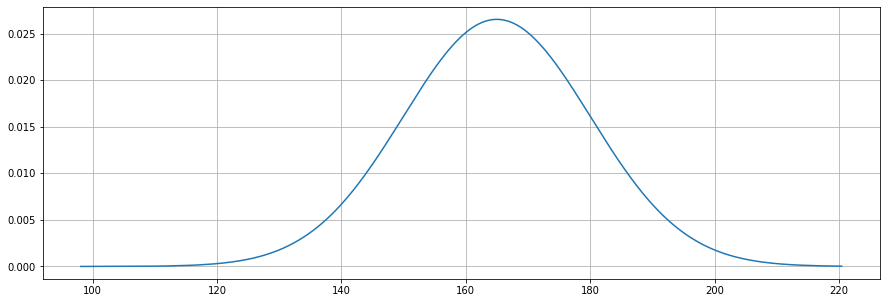

In [ ]:
# S3.3: Create a line plot for the sorted heights and the corresponding probability values.
plt.figure(figsize=(15,5))
plt.plot(sorted_heights,prob_array)
plt.grid()
plt.show()

The above curve looks almost exactly like the bell curve we created using the `distplot()` function of the `seaborn` module. It is called a probability density curve or normal distribution or bell curve. Every point on the above curve can be represented using the probability density function, i.e., $\rho(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$

To calculate probabilities of a continuous random variable, we have to calculate the area of the region that lies below the curve. Hence, to find the probability of the random variable $150 \le X \le 180$, we need to calculate the area of the shaded region as shown in the image below.

<img src = "https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/bell_curve.png" width=800>

The region in the above curve is enclosed between $X = 150, X = 180$ and $\rho(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$ 

To find the area of a region, we use integration. In this case, we need to find the area of the shaded region enclosed between $X = 150, X = 180$ and $\rho(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$. 

Therefore, the expression to calculate the area of a region is given as

$$A = \int_{X = 150}^{X = 180} \rho(x) $$

In this case, the area represents the probability, so the above expression becomes

$$P(150 \le X \le 180) = \int_{150}^{180} \rho (x) dx$$

After substituting the values of $\mu$ and $\sigma$ in the PDF, we get

$$\Rightarrow \rho (x) = \frac{1}{15 \sqrt{2 \pi}}e^{-\frac{1}{450} (x - 165)^2}$$

Therefore

$$\Rightarrow P(150 \le X \le 180) = \int_{150}^{180} \frac{1}{15 \sqrt{2 \pi}}e^{-\frac{1}{450} (x - 165)^2} dx$$

If we can solve the above integration, we will get the probability of a person having a height between 150 cm and 180 cm.

To solve the above integration, we have to import the `integrate` module from the `scipy` package. Then we need to use the `quad()` function. It takes the following input:

1. The function which needs to be integrated. In this case, the PDF, i.e., `prob_density_func` function needs to be integrated, 

2. The lower and upper limits of the random variable. In this case, $X = 150$ and $X = 180$ are lower and upper limits respectively.

3. The parameters of the above probability density function which needs to be integrated. In this case, the parameters of the `prob_density_func` are the mean height = 165 cm and the standard deviation height = 180 cm.

The `quad()` function returns a tuple in which the first item is the required area of the region (or probability value).


In [ ]:
# T3.1: Find the probability of the random variable 150 <= X <= 180.
from scipy import integrate

req_prob = integrate.quad(prob_density_func, 150, 180, args = (np.mean(heights), np.std(heights)))
req_prob

(0.6813066607095845, 7.564023415502601e-15)

The area of the curve enclosed between $X = 150, X = 180$ and $\rho(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$ is $0.68$ which is also the probability of a person having a height between 150 cm and 180 cm. In terms of percentage, the probability of a person having a height between 150 cm and 180 cm is $68 \%$ approx. 

We already learnt that $68 \%$ values between **one-sigma** about mean in a normal distribution. In this class, we have kind of verified this fact using the concept of continuous random variable and probability density function.

Similarly, you can verify the probability values for the **two-sigma** and **three-sigma** cases.

In [ ]:
# S3.4: Find the probability of the random variable 135 <= X <= 195.
req_prob = integrate.quad(prob_density_func, 135, 195, args = (np.mean(heights), np.std(heights)))
req_prob

(0.9538799857969441, 1.6995177167782295e-11)

In [ ]:
# S3.5: Find the probability of the random variable 120 <= X <= 210.
req_prob = integrate.quad(prob_density_func, 120, 210, args = (np.mean(heights), np.std(heights)))
req_prob

(0.9972233481790873, 1.1071403223290074e-14)

In [ ]:
# S3.6: Find the probability of the random variable 121 <= X <= 147.
req_prob = integrate.quad(prob_density_func, 121, 147, args = (np.mean(heights), np.std(heights)))
req_prob

(0.1141586276071349, 1.267415368290502e-15)

---

#### Activity 6: Fill Area Using the `fill_between()` Function 

Let's create the following bell curve using the `matplotlib.pyplot` module.

<img src = "https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/bell_curve.png" width=800>

To create the above curve, you need to follow the steps described below.

1. Slice the `heights` array such that the resulting array containing heights between 150 cm and 180 cm.

2. Create the line plot between `sorted_heights` and `prob_array` arrays using the `plot()` function. The curve should look like a bell-shaped curve.

3. Use the `fill_between()` function to fill the area below the PDF, $X = 150$ and $X = 180$. It takes the following values as inputs:

  - `x` which should be an array containing the values for the horizontal axis. In this case, the sorted `numpy` array containing heights values between $X = 150$ and $X = 180$.

  - `y1` is an array containing the values corresponding to the values in `x` array. In this case the probability density values for the heights between 150 cm and 180 cm.

  - `alpha` (optional) to provide translucency to the shaded region. Its value ranges between 0 and 1.

4. Use the `axvline()` function to draw vertical lines at $X = 150$ and $X = 180$. 

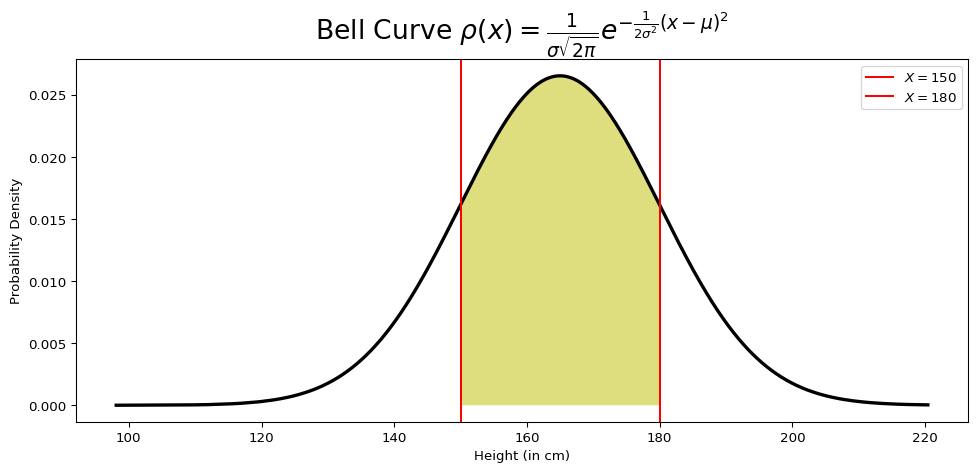

In [ ]:
# S6.1: Create the above bell curve.
# Uncomment the line below.
new_array = sorted_heights[(sorted_heights >= 150) & (sorted_heights <= 180)]
array_length = len(sorted_heights)

plt.figure(figsize=(12, 5), dpi = 96)
plt.title(label = r"Bell Curve $\rho(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$", fontsize=20) # MathJaX equations
plt.plot(sorted_heights, prob_array, color = 'black', linewidth = 2.5)
plt.fill_between(x = new_array, y1 = prob_density_func(new_array, np.mean(heights), np.std(heights)), 
                 facecolor = 'y', alpha = 0.5)
plt.axvline(x = 150, color = 'r', linestyle = '-', label = r"$X = 150$")
plt.axvline(x = 180, color = 'r', linestyle = '-', label = r"$X = 180$")
plt.xlabel("Height (in cm)")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

---

Congratulations! A new milestone; a new challenge!
 
You have to apply the programming constructs learned during the past few classes to analyse a fictional lottery company, WHJR Lottery. You will find out why one should never gamble and how a house always wins!! You may start working on **Capstone Project 13.**

---

### **Project**
You can now attempt the **Applied Tech Project 48 - Expected Value and Continuous Probability** on your own.

**Applied Tech Project 48 - Expected Value and Continuous Probability**: https://colab.research.google.com/drive/1CjDwIs1Fv0VbWZiI0f4krkodPLHRNQlQ

---